### Tumor and blood vessel network instance saving tests

In this notebook i will export a tumor instance evolved for 300 steps, and also a blood vessel network simulated around the tumor

In [1]:
from TumorModel import Tissue
import numpy as np
import matplotlib.pyplot as plt
from AngiogenesisModel import AngiogenesisModel
from TumorModel import CellType

### Tumor instance save

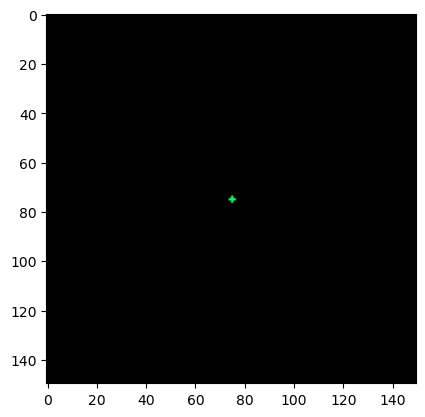

In [2]:
automatonWidth = 150
automatonHeight = 150
centerX = int(automatonWidth/2)
centerY = int(automatonHeight/2)


#Initialize tissue
tissue = Tissue(automatonWidth,automatonHeight)

#Add proliferating cells in the center of the automaton
tissue.addProliferatingCell(centerX, centerY, False, 0)
tissue.addProliferatingCell(centerX + 1, centerY, False, 0)
tissue.addProliferatingCell(centerX - 1, centerY, False, 0)
tissue.addProliferatingCell(centerX, centerY - 1, False, 0)
tissue.addProliferatingCell(centerX, centerY + 1, False, 0)

plt.figure()
plt.imshow(tissue.getPicture(True))


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [01:05<00:00,  4.56it/s]


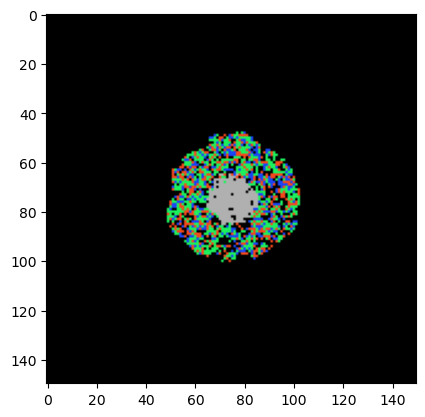

In [3]:
#Evolve 300 steps  without vasculature
nEvolutionSteps = 300
tissue.evolveWithMovieInitially(nEvolutionSteps, True)

plt.figure()
plt.imshow(tissue.getPicture(True))

In [4]:
#Now let's save the instance
fileName = "tumor_instance.pkl"
tissue.exportTumorInstance(fileName)

Object saved to tumor_instance.pkl


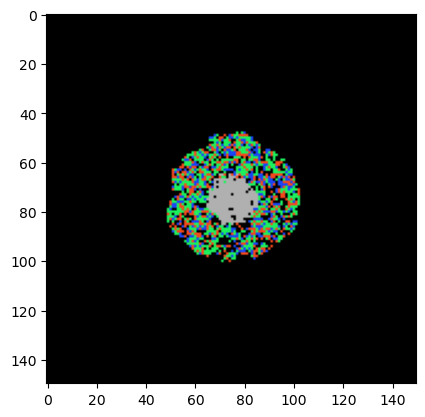

In [5]:
#Let's try opening it 

#Create a tissue object skeleton
tissue = Tissue(150,150)
#Open the object instance file
tissue = tissue.importTumorInstance(fileName)
plt.figure()
plt.imshow(tissue.getPicture(True))


It seems to be working. Let's do the same with the angiogenesis network so that i can save instances of it.

### Blood vessel network instance save

In [6]:
#To prepare the blood vessel network we first have to indicate in a matrix those positions that are occupied
#with proliferating cells

tumorSlices = tissue.evolutionMovie

proliferatingPositions = np.zeros((automatonHeight, automatonWidth))
finalSlice = tumorSlices[:,:,:,-1]
for i in range(0,automatonHeight):
    for j in range(0,automatonWidth):
        if((finalSlice[i,j,:] == CellType.PROLIFERATING.value).all()):
            proliferatingPositions[i,j] = 1

#Now we can create our model
bloodVesselNet = AngiogenesisModel(automatonWidth, automatonHeight)
bloodVesselNet.setInitialConcentrations(proliferatingPositions)

#Tipcells will start in some portions of the automaton borders
tipCellLocations = np.zeros((automatonHeight, automatonWidth))

for i in range(0, automatonWidth):
    #Every 10 positions in the automaton border set a tip cell
    if(i % 20 == 0):
        tipCellLocations[1,i] = 1
        tipCellLocations[automatonHeight-2,i] = 1
        tipCellLocations[i,1] = 1
        tipCellLocations[i,automatonWidth-2] = 1
        
#Set the tip cells
bloodVesselNet.setTipCells(tipCellLocations)

#Evolve the blood vessel network
nEvolutionSteps = 200
bloodVesselNet.evolveSystem(nEvolutionSteps)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [04:27<00:00,  1.34s/it]


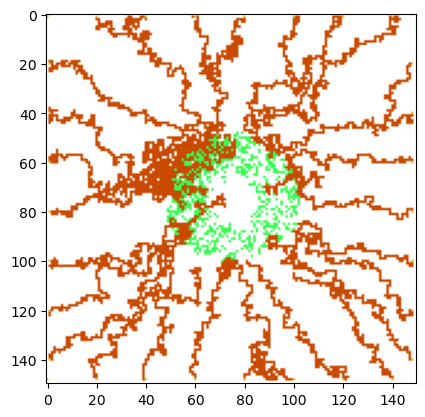

In [7]:
plt.figure()
plt.imshow(bloodVesselNet.getPicture(tipCellLocations, proliferatingPositions, bloodVesselNet.occupiedCells))

In [8]:
#Save the blood vessel network
fileName = "angiogenesis_instance_big.pkl"
bloodVesselNet.saveBloodVesselNetworkInstance(fileName)

Object saved to angiogenesis_instance_big.pkl


In [9]:
#Open the blood vessel network
bloodVesselNet = AngiogenesisModel(150, 150)
bloodVesselNet = bloodVesselNet.openBloodVesselNetworkInstance(fileName)

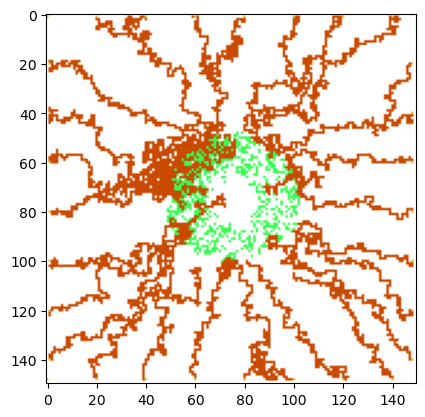

In [10]:
plt.figure()
plt.imshow(bloodVesselNet.getPicture(tipCellLocations, proliferatingPositions, bloodVesselNet.occupiedCells))